# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 4.3: Teorema da convolução e filtragem

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

### Teorema da Convolução

Se $x, y, w\in\mathbb{C}^N$ onde $w=x*y$, então

\begin{equation*}
	W_k = X_k Y_k,\quad k= 0, 1, \dots, N-1
\end{equation*}

onde $X, Y, W\in\mathbb{C}^N$ são as DFT's de $x, y, w$, respectivamente.

**Prova:** Basta usar a definição da DFT:

\begin{align*}
	W_k &= \sum\limits_{n=0}^{N-1}w_ne^{-i2\pi kn/N} \\
	&= \sum\limits_{n=0}^{N-1}\left(\sum\limits_{m=0}^{N-1}x_my_{n-m}\right)e^{-i2\pi kn/N} \\
	&= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi k(r+m)/N} \\
	&= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi kr/N}e^{-i2\pi km/N}
\end{align*}

\begin{align*}
	W_k &= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi kr/N}e^{-i2\pi km/N} \\
	&= \left(\sum\limits_{m=0}^{N-1}x_me^{-i2\pi km/N}\right)\left(\sum\limits_{r=-m}^{N-1-m}y_re^{-i2\pi kr/N}\right) \\
	&= X_k\left(\sum\limits_{r=0}^{N-1}y_re^{-i2\pi kr/N}\right) \\
	&= X_kY_k
\end{align*}

### Ação de um filtro nas componentes do sinal

Considere um filtro arbitrário definido por um vetor de coeficientes $h\in\mathbb{C}^N$ com saída $y=x*h\in\mathbb{C}^N$:

$$x\longrightarrow\begin{array}{|c|}\hline h\\ \hline\end{array}\longrightarrow y=x*h$$

$$$$

$$$$

$$X\longrightarrow\begin{array}{|c|}\hline H\\ \hline\end{array}\longrightarrow Y=XH$$

Quando $x=E_{N,k}$, temos $X = (0, 0, \dots, 0, N, 0, \dots, 0)'$. Pelo teorema da convolução

\begin{equation*}
	Y = XH = (0, 0, \dots, 0, NH_k, 0, \dots, 0)'
\end{equation*}

Esta saída no domínio do tempo é

\begin{equation*}
	y = \frac{1}{N}\sum\limits_{r=0}^{N-1}Y_r E_{N,r} = H_kE_{N,k}.
\end{equation*}

Mas $y = x*h = M_h x = M_hE_{N,k}$, logo

\begin{equation*}
	M_hE_{N,k} = H_kE_{N,k}
\end{equation*}

Esta expressão mostra que os vetores $E_{N,k}$ são **autovetores** da matriz $M_h$ associada ao filtro, com correspondentes autovalores dados por $H_k$. 

Cada componente $E_{N,k}$ de um sinal arbitrário é processada pelo filtro $H$ produzindo a saída

\begin{align*}
	y &= H_kE_{N,k} \\
	&= |H_k|e^{i(\measuredangle H_k)}\begin{pmatrix}
		\vdots \\ e^{i2\pi kn/N} \\ \vdots
	\end{pmatrix} \\
	&= |H_k|\begin{pmatrix}
		\vdots \\ e^{i(2\pi kn/N + \measuredangle H_k)} \\ \vdots
	\end{pmatrix}
\end{align*}

\begin{align*}
	y &= |H_k|\begin{pmatrix}
		\vdots \\ e^{i2\pi k\left(n + \frac{N\measuredangle H_k}{2\pi k}\right)/N} \\ \vdots
	\end{pmatrix}
\end{align*}

ou seja, a magnitude da componente é multiplicada por $|H_k|$, e sua fase é adicionada de $\measuredangle H_k$ radianos em cada componente, o que equivale a um *shift* temporal de $\frac{N\measuredangle H_k}{2\pi k}$ amostras em cada componente.

No caso particular em que $\measuredangle H_k = \alpha k$ (resposta linear em fase), teremos

\begin{equation*}
	y = |H_k|\begin{pmatrix}
		\vdots \\ e^{i2\pi k\left(n + \frac{N\alpha}{2\pi}\right)/N} \\ \vdots
	\end{pmatrix}
\end{equation*}

Como $\frac{N\alpha}{2\pi}$ não depende da frequência, um filtro com resposta em fase linear preservará as relações de fase entre componentes senoidais diversas em um sinal de entrada geral. Assim, todas as componentes senoidais sofrem o mesmo *shift* de $$\frac{N\alpha}{2\pi}\ \text{amostras},$$
que é chamado de **atraso de grupo**.

### Exemplo 4.3:

O filtro da média $$w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}$$ pode ser
escrito como $$w = x*h,$$
onde os coeficientes do filtro são $h_0=\frac{1}{2}$ e $h_1=\frac{1}{2}$, de tal forma que
$$\begin{array}{ll}
w_n &= \sum\limits_{k=0}^{N-1}x_kh_{n-k} = \sum\limits_{k=0}^{N-1}h_kx_{n-k}\\
&= h_0x_n+h_1x_{n-1} = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}.\end{array}$$


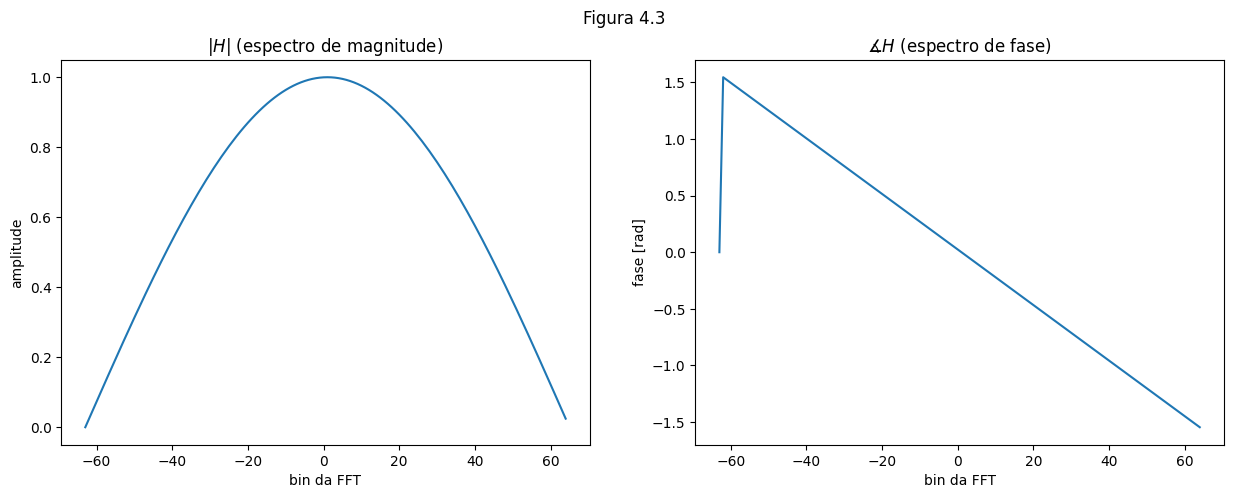

In [2]:
N = 128;h = np.zeros(N);h[0] = h[1] = 0.5;H = np.fft.fft(h)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.abs(H)))
ax[0].set_title('$|H|$ (espectro de magnitude)');ax[0].set_xlabel('bin da FFT');ax[0].set_ylabel('amplitude')
ax[1].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.angle(H)))
ax[1].set_title('$\measuredangle H$ (espectro de fase)');ax[1].set_xlabel('bin da FFT');ax[1].set_ylabel('fase [rad]')
fig.suptitle("Figura 4.3")
plt.show()

Havíamos calculado a resposta em frequência do filtro da média como

$$H_k = \cos(2\pi k/N) e^{-i\pi k/N}$$

ou equivalentemente

$$M_hE_{N,k} = \cos(2\pi k/N) e^{-i\pi k/N}E_{N,k}$$

logo $\measuredangle H_k = (-\pi /N)k$ (resposta linear em $k$), com atraso de grupo correspondente a $$\frac{N\measuredangle H_k}{2\pi k} = \frac{-N\pi/N}{2\pi} = -\frac{1}{2}\ \text{amostra.}$$

Isso é intuitivo ao considerarmos que o sinal de saída é uma média entre o sinal original e o sinal atrasado em 1 amostra:

$$y_n = \frac{1}{2}x_n +\frac{1}{2}x_{n-1}\\ y = \frac{1}{2}\left(\begin{array}{c}(x_0,x_1,\ldots,x_{N-1})\\+\\(x_{-1},x_0,\ldots,x_{N-2})\end{array}\right)\\ \phantom{y} = \left(x_{-\frac{1}{2}},x_{\frac{1}{2}},\ldots,x_{N-1-\frac{1}{2}}\right)$$
onde os índices fracionários representam a interpolação linear do sinal.

### Resposta ao impulso

Considere o vetor $h\in\mathbb{C}^N$ associado à equação $y=x*h$, e seja a entrada $x=\delta$ onde

\begin{equation*}
	\delta = \left\{\begin{array}{ll}
		1 & \text{ se }n=0 \\
		0 & \text{ c.c.} \\
	\end{array}\right.
\end{equation*}

Esse sinal $\delta$ é chamado de **impulso unitário**.

 A resposta do filtro a esse impulso será $y = \delta*h$, onde

\begin{align*}
	y_n &= \sum\limits_{k=0}^{N-1}\delta_kh_{n-k}\\
	&= h_n
\end{align*}

Assim, vemos que $\delta$ é o **elemento neutro** da operação de convolução, e $h$ é denominado **resposta ao impulso** associada ao filtro.

### Resposta em Frequência

Denominamos de **resposta em frequência** ao vetor $H = DFT(h)$.

Lembre que cada coeficiente $H_k\in\mathbb{C}$ modifica a componente de frequência $k$ de um sinal da entrada $x$ de acordo com o teorema da convolução

$$y = x*h \implies Y_k=H_kX_k.$$

Denominamos de **resposta em magnitude** ao vetor $|H|\in\mathbb{R}^N$, e de **resposta em fase** ao vetor $\measuredangle H\in\mathbb{R}^N$, levando em consideração que

$$Y_k = H_kX_k = |H_k|e^{i\measuredangle H_k}|X_k|e^{i\measuredangle X_k}=|H_k||X_k|e^{i(\measuredangle H_k+\measuredangle X_k)},$$

ou seja, que as magnitudes das componentes da entrada são multiplicadas por $|H_k|$ e as fases são acrescidas de $\measuredangle H_k$.

### Desenho de filtros

Em princípio, podemos definir arbitrariamente qualquer resposta em frequência $H\in\mathbb{C}^N$ desejada, obtendo a resposta ao impulso pela expressão $h = IDFT(H)$, de tal forma que que $y=x*h$ terá espectro $Y_k=H_kX_k$.

Entretanto

\begin{array}{ll}
	1. & \text{Se}\ H\ \text{é um vetor qualquer, então}\ h\ \text{pode não ser real,}\\
    & \text{e com isso}\ x*h\ \text{também pode não ser real.}\\
    & \text{Lembrando que}\ h\in\mathbb{R}^N \Leftrightarrow H_k = \overline{H_{-k}}\\
	& \text{uma solução é definir}\ H_k\ \text{arbitrariamente para}\ k\le \frac{N}{2}\\
    & \text{e depois copiar}\ H_{N-k} = H_{-k} = \overline{H_{k}},\ \forall k>\frac{N}{2}.\\
	2. & \text{Normalmente o vetor}\ h = IDFT(H)\\
    &\text{pode conter muitos coeficientes}\ \neq 0,\\
    & \text{tornando o filtro computacionalmente caro.}
\end{array}

### Observação: custo computacional da convolução

\begin{array}{ll}
		1. & y_n = \sum\limits_{k=0}^{N-1}x_kh_{n-k}, n = 0, \dots, N-1\\
        &(\text{custo}\ \mathcal{O}(N^2))\\
		2. & y = IDFT(Y)\ \text{onde}\ Y_k = X_kH_k,\ k = 0, \dots, N-1\\
        &(\text{custo}\ \mathcal{O}(N\log N))\\
		3. & \text{se}\ \#h = \#\{h_n\neq 0\}\ \text{é pequeno}\ \left(\mathcal{O}(1)\right),\ \text{então calcular}\\
		& y_n = \sum\limits_{k=0}^{N-1}x_kh_{n-k} = \sum\limits_{k: h_k\neq 0}h_kx_{n-k}, n = 0, \dots, N-1\\
		& \text{tem custo}\ \mathcal{O}(N).
\end{array}

### Filtros eficientes (com poucos "taps")

Uma forma metafórica de imaginar o processo de filtragem é pensar no fluxo $x$ como um líquido passando por um cano:
$$\begin{array}{ll}
& \rule{10cm}{0.5pt}\\
{x\longrightarrow}\atop\ & \rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{2cm}{0.5pt}\\
&\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{2cm}\\
&\hspace{1.75cm}x^{(-i)}\hspace{1.2
cm}x^{(-j)}\hspace{1.2cm}x^{(-k)}\hspace{1.2cm}x^{(-l)}\hspace{2cm}\\
&\hspace{1.75cm}\cdot h_i\hspace{1.4
cm}\cdot h_j\hspace{1.4cm}\cdot h_k\hspace{1.4cm}\cdot h_l\hspace{2cm}\longrightarrow y
\end{array}$$
sendo que a saída do filtro

$$y_n = \sum\limits_{k: h_k\neq 0}h_kx_{n-k}\quad \left(\text{alternativamente:}\ y = \sum\limits_{k: h_k\neq 0}h_kx^{(-k)}\right)$$

poderia ser interpretada como uma mistura das cópias atrasadas ($x_{n-k}$\ , ou como um sinal $x^{(-k)}$ atrasado como um todo em $k$ amostras) da entrada, que saem por "torneiras" (*taps* em inglês) posicionadas a uma distância $k$ da entrada, com "vazão" correspondente a $h_k$.

O termo **tap** se generalizou como referência aos coeficientes não-nulos da resposta ao impulso $h$, sendo que filtros com poucos taps permitem sua implementação com custo $\mathcal{O}(1)$ por amostra, sendo considerados por isso bastante eficientes e adequados a aplicações computacionalmente intensivas (por exemplo, processamento em tempo-real).
 
Uma estratégia para deixar um filtro mais eficiente é zerar componentes de $h$ que satisfaçam $|h_m| < \epsilon$ para algum $\epsilon > 0$ escolhido, como no algoritmo de compressão estudado no capítulo 3. O resultado será um filtro aproximado, cuja distorção pode ser medida a partir das respostas em frequência antes e depois da modificação, como veremos no próximo exemplo.

### Exemplo 4.4: filtro passa-alta projetado a partir de uma resposta em frequência ideal.

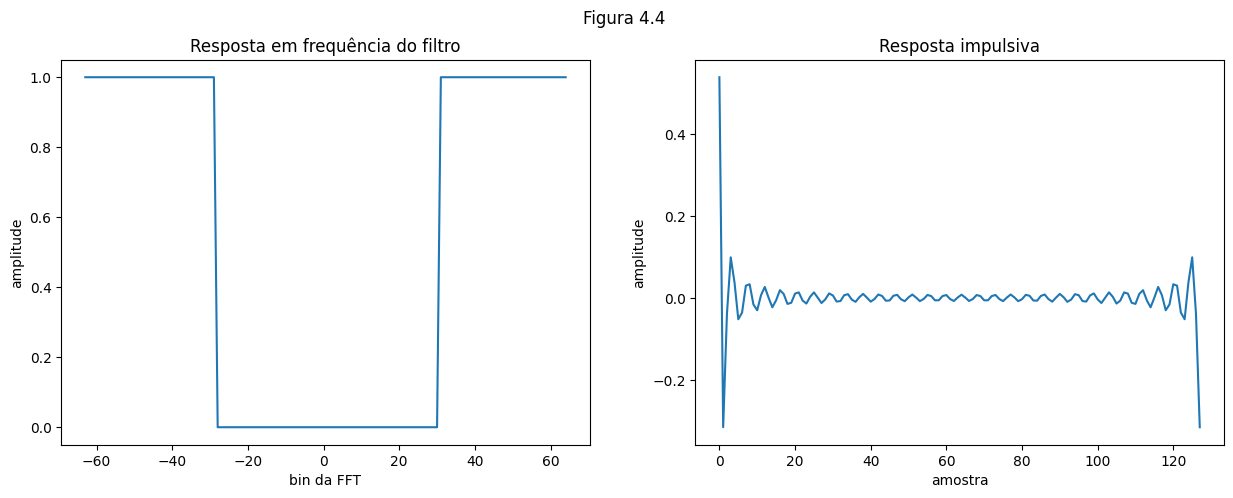

In [3]:
N = 128;H = np.concatenate((np.zeros(30),np.ones(69),np.zeros(29)));h = np.real(np.fft.ifft(H))
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(H));ax[0].set_title('Resposta em frequência do filtro');ax[0].set_xlabel('bin da FFT');ax[0].set_ylabel('amplitude')
ax[1].plot(h);ax[1].set_title('Resposta impulsiva');ax[1].set_xlabel('amostra');ax[1].set_ylabel('amplitude')
fig.suptitle("Figura 4.4");plt.show()

### Versões computacionalmente mais "baratas" (com menos "taps") do mesmo filtro passa-alta.

In [4]:
# Os limiares abaixo são usados para "cortar" coeficientes do filtro e com isso diminuir o número de termos na equação de convolução
EPSVALS =  [ 0.01, 0.05, 0.1 ]
def plota_filtro_com_menos_taps(epsilon,h,ax,k):
    mask = (abs(h)>=epsilon) # seleciona os coeficientes acima do limiar
    ntaps = sum(mask) # calcula o número de coeficientes do filtro
    heps = h*mask # heps é o filtro simplificado com limiar epsilon
    # Mostra a resposta impulsiva com os coeficientes eliminados
    ax[0,k].plot(heps);ax[0,k].set_title("Epsilon = "+str(epsilon)+", Filtro com "+str(ntaps)+" taps")
    # Compara a resposta do filtro simplificado com a resposta ideal do filtro original (pontilhada)
    ax[1,k].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.real(np.fft.fft(heps))), label='filtro obtido')
    ax[1,k].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(H),".", label='filtro ideal')

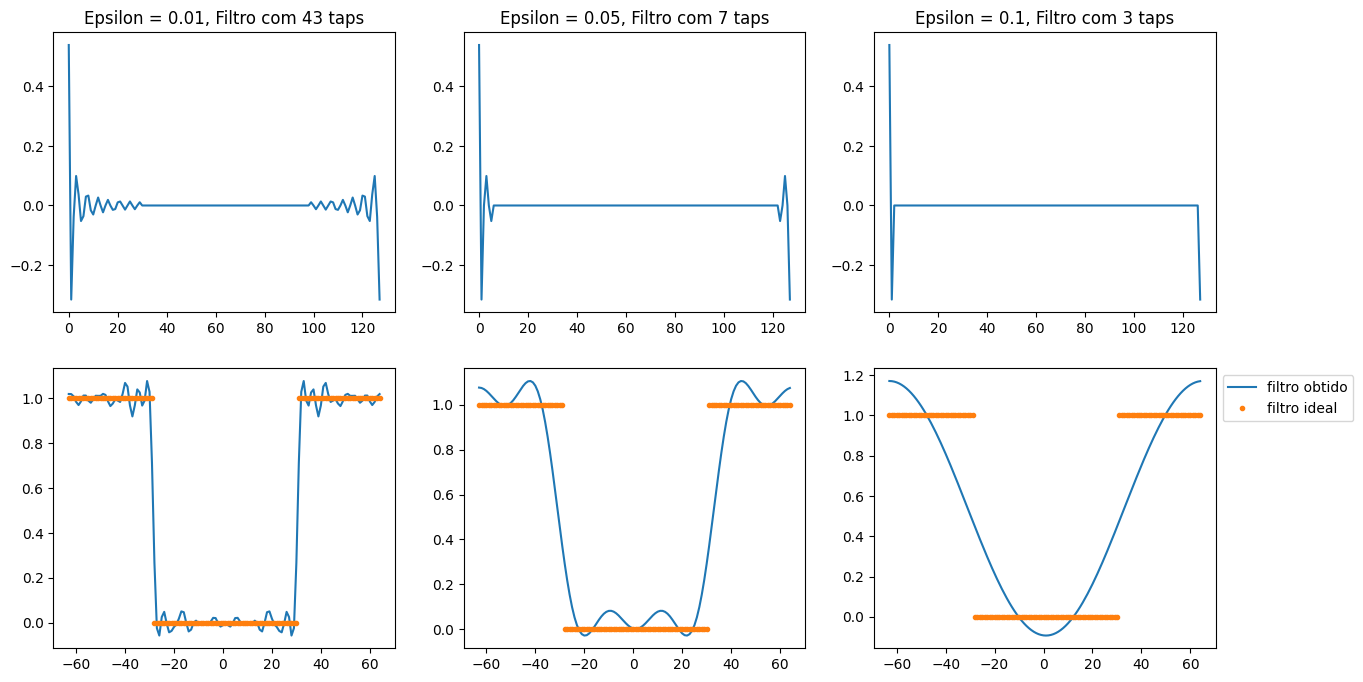

In [5]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
for k in range(len(EPSVALS)): plota_filtro_com_menos_taps(EPSVALS[k],h,ax,k)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));plt.show()

### Colocando em perspectiva a "perfeição" da resposta em frequência do filtro original (com banda de corte nula).

Este exemplo (que não está no livro) se contrapõe à idéia de que o filtro desenhado a partir da resposta em frequência H tenha exatamente o comportamento de filtro ideal que o gráfico de H poderia sugerir.

Para este exemplo, construiremos "na mão" a resposta em magnitude do filtro H para funções "básicas" do tipo $\cos(2\pi f\frac{n}{N})$, inicialmente para frequências do tipo $f=0,1,...,N-1$, e posteriormente para outras frequências intermediárias.

#### Computa a resposta em magnitude para as frequências f=0,1,2,...,N-1

In [6]:
FREQS = np.arange(-N//2+1,N//2+1,1)
R = [ 0 ] * len(FREQS)
t = np.arange(N)
for k in range(N):
    # cria função básica de frequência k
    x = np.cos(2*np.pi*FREQS[k]*t/N)
    # filtra por h
    y = np.real(np.fft.ifft(np.fft.fft(x)*H))
    # constrói gráfico de magnitude da resposta
    # (fator de escala da saída do filtro)
    R[k] = np.linalg.norm(y)/np.linalg.norm(x)

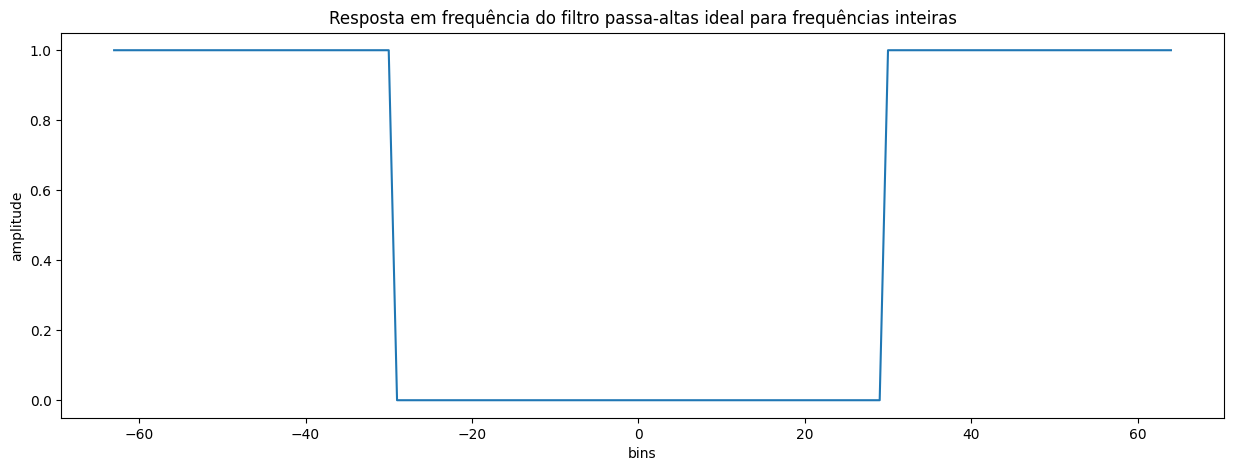

In [7]:
# Mostra o gráfico da resposta de magnitude.
plt.figure(figsize=(15,5));plt.title("Resposta em frequência do filtro passa-altas ideal para frequências inteiras")
plt.plot(FREQS,R);plt.xlabel("bins");plt.ylabel('amplitude');plt.show()

### Repete a mesma construção com frequências não-inteiras
#### Observe que a única diferença do código abaixo é que agora as frequências são f=0,0.1,0.2,...,N-1

In [8]:
FREQS = np.arange(-N//2+1,N//2+1,0.1)
R = [ 0 ] * len(FREQS)
t = np.arange(N)
for k in range(len(FREQS)):
    # cria função básica de frequência k
    x = np.cos(2*np.pi*FREQS[k]*t/N)
    # filtra por h
    y = np.real(np.fft.ifft(np.fft.fft(x)*H))
    # constrói gráfico de magnitude da resposta
    # (fator de escala da saída do filtro)
    R[k] = np.linalg.norm(y)/np.linalg.norm(x)

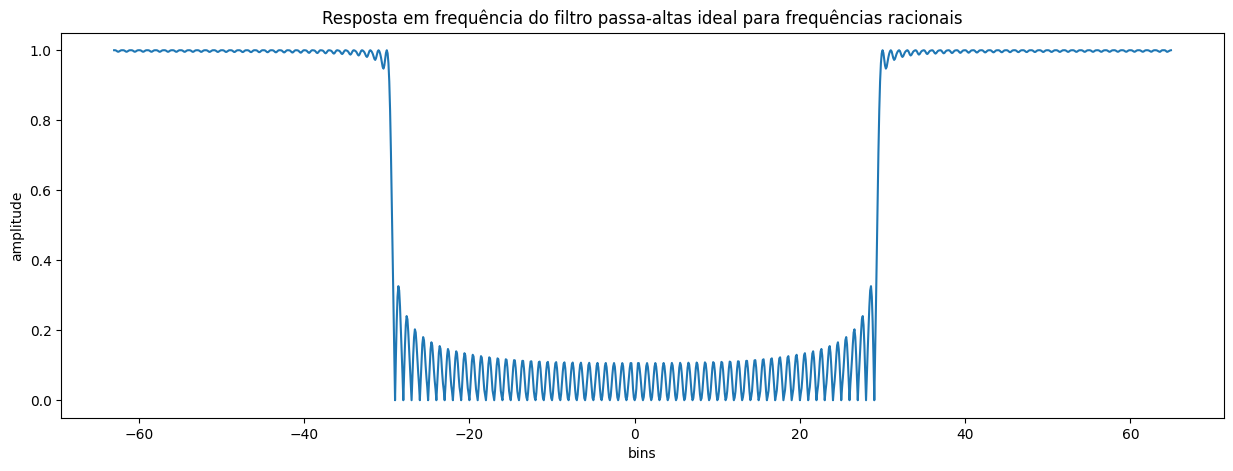

In [9]:
# Mostra o gráfico da resposta de magnitude.
plt.figure(figsize=(15,5));plt.title("Resposta em frequência do filtro passa-altas ideal para frequências racionais")
plt.plot(FREQS,R);plt.xlabel("bins");plt.ylabel('amplitude');plt.show()